<a href="https://colab.research.google.com/github/abdulilahalqasem/CS438-Project/blob/main/mobile_speed_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **#1 Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import pycaret
from pycaret.classification import *

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

print('- pandas {}'.format(pd.__version__))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- missingno {}'.format(msno.__version__))
print('- pycaret {}'.format(pycaret.__version__))
print('- sklearn {}'.format(sklearn.__version__))

- pandas 1.5.3
- NumPy 1.23.5
- Matplotlib 3.7.1
- Seaborn 0.12.2
- missingno 0.5.2
- pycaret 3.2.0
- sklearn 1.2.2


In [ ]:
# pandas dataframe options tweaking.
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

#pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


## **#2 Load Dataset and Preview The Data**

In [ ]:
dt_android_url = "/content/android.csv"
dt_ios_url     = "/content/iOS.csv"
android_df = pd.read_csv(dt_android_url)
ios_df     = pd.read_csv(dt_ios_url)

In [ ]:
android_df.head()

,test_id,android_device_id,test_date,download_kbps,upload_kbps,latency,server_name,server_country,client_country,client_region_name,client_city,client_latitude,client_longitude,miles_between,connection_type,brand,location_type,gmaps_type,jitter_a,server_selection_a,carrier_name_a,km_between
0,7923715703,383783238,11/25/2021 18:57,402382,18946,14,Dammam,Saudi Arabia,Saudi Arabia,Eastern Province,Dammam,26.434,50.112,11.752,24,HONOR,2,locality,21.9,Auto,TEl_co_1,18.891
1,7924279882,373115746,11/25/2021 23:18,108705,38199,16,Khobar,Saudi Arabia,Saudi Arabia,Eastern Province,Tarut,26.567,50.071,25.441,24,Xiaomi,1,sublocality_level_1,2.6,Auto,tel_co_2,40.898
2,7906701631,348926553,11/19/2021 14:38,3399,309,34,Bahrah,Saudi Arabia,Saudi Arabia,Makkah Province,Jeddah,21.684,39.212,25.120,15,HUAWEI,1,locality,5.9,Auto,Tel_co_3,40.381
3,7910730246,295867697,11/20/2021 23:04,6102,15505,28,Baha,Saudi Arabia,Saudi Arabia,Al Bahah Province,Baljurashi,19.569,41.671,33.933,15,HUAWEI,1,locality,22.2,USER,tel_co_2,54.549
4,7892907247,306911305,11/14/2021 13:56,165712,56707,33,Jubail,Saudi Arabia,Saudi Arabia,Riyadh Province,Riyadh,24.656,46.717,238.495,15,HUAWEI,2,locality,1.2,USER,tel_co_2,383.393


In [ ]:
ios_df.head()

,test_id,iphone_device_id,test_date,jitter_a,carrier_name_a,client_region_name,client_city,device_name_a,download_kbps,upload_kbps,latency,connection_type
0,4867410338,231005010,11/21/2021 0:01,7.9,Tel_co_1,Eastern Province,Dammam,iPhone XS,44792,4715,34,2
1,4856897929,230367449,11/13/2021 20:03,0.5,Tel_co_2,Makkah Province,Jeddah,iPhone 13 Pro Max,104300,18424,2,2
2,4839606663,231607369,11/2/2021 0:25,107.8,Tel_co_2,Eastern Province,Al Hufuf,iPhone 12 Pro 5G,1452,118,58,2
3,4865705568,213163021,11/19/2021 21:19,6.3,Tel_co_2,Riyadh Province,Riyadh,iPhone 12 Pro Max 5G,111805,12480,28,12
4,4872611668,196398438,11/24/2021 17:18,1.2,Tel_co_2,Riyadh Province,Riyadh,iPhone 11,204351,34303,6,2


In [ ]:
# Check the shape of the data.
print("Andorid dataset shape: ", android_df.shape)
print("IOS dataset shape:     ", ios_df.shape)

Andorid dataset shape:  (5000, 22)
IOS dataset shape:      (10000, 12)


In [ ]:
# Check the number of unique users.
print('number of unique users in Andorid dataset: ', len(np.unique(android_df.test_id)))
print('number of unique users in IOS dataset:     ', len(np.unique(ios_df.test_id)))

number of unique users in Andorid dataset:  5000
number of unique users in IOS dataset:      10000


Note:- We can see there are no duplicate records.

In [ ]:
# Check the data types of the Android dataset.
android_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   test_id             5000 non-null   int64  
 1   android_device_id   5000 non-null   int64  
 2   test_date           5000 non-null   object 
 3   download_kbps       5000 non-null   int64  
 4   upload_kbps         5000 non-null   int64  
 5   latency             5000 non-null   int64  
 6   server_name         5000 non-null   object 
 7   server_country      5000 non-null   object 
 8   client_country      5000 non-null   object 
 9   client_region_name  5000 non-null   object 
 10  client_city         5000 non-null   object 
 11  client_latitude     5000 non-null   float64
 12  client_longitude    5000 non-null   float64
 13  miles_between       5000 non-null   float64
 14  connection_type     5000 non-null   int64  
 15  brand               5000 non-null   object 
 16  locati

In [ ]:
# Check the data types of the IOS dataset.
ios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   test_id             10000 non-null  int64  
 1   iphone_device_id    10000 non-null  int64  
 2   test_date           10000 non-null  object 
 3   jitter_a            10000 non-null  float64
 4   carrier_name_a      10000 non-null  object 
 5   client_region_name  10000 non-null  object 
 6   client_city         10000 non-null  object 
 7   device_name_a       10000 non-null  object 
 8   download_kbps       10000 non-null  int64  
 9   upload_kbps         10000 non-null  int64  
 10  latency             10000 non-null  int64  
 11  connection_type     10000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 937.6+ KB


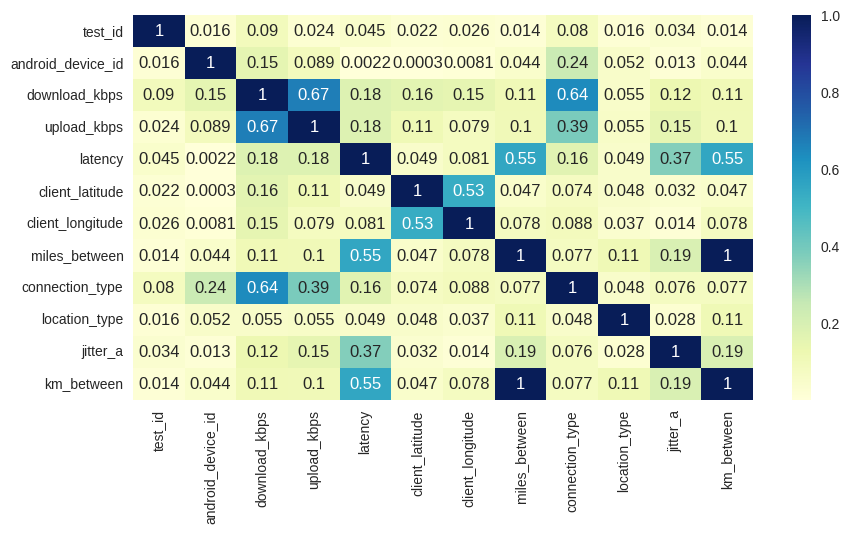

In [ ]:
# Correlation matrix to see if there are features with high correlation in the Android dataset.
plt.figure(figsize = (10,5))
android_df_corr = android_df.corr().abs()
hm = sns.heatmap(android_df_corr, cmap="YlGnBu", annot=True)
plt.show()

'miles_between' and 'km_between' columns shown in the correlation matrix have a perfect 1 score because they are the same column but with different measuring units.

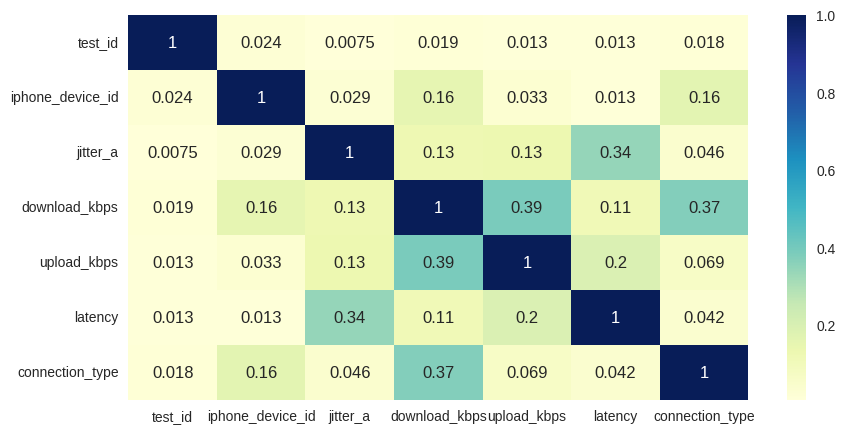

In [ ]:
# Correlation matrix to see if there are features with high correlation in the IOS dataset.
plt.figure(figsize = (10, 5))
ios_df_corr = ios_df.corr().abs()
hm = sns.heatmap(ios_df_corr, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Generate summary statistics for all of the data in the Android dataset.
android_df[['download_kbps', 'upload_kbps', 'latency', 'jitter_a', 'connection_type', 'brand', 'carrier_name_a', 'km_between']].describe()

,download_kbps,upload_kbps,latency,jitter_a,connection_type,km_between
count,5.000e+03,5000.000,5000.000,5000.00,5000.000,5000.000
mean,1.919e+05,26068.036,36.676,22.62,17.608,295.014
std,2.589e+05,26872.785,46.396,72.98,4.215,1178.127
min,0.000e+00,0.000,3.000,0.20,0.000,0.000
25%,2.335e+04,6463.750,19.000,4.70,15.000,12.521
50%,7.237e+04,18286.500,27.000,7.80,15.000,33.241
75%,2.637e+05,37574.500,37.000,14.90,24.000,132.833
max,1.753e+06,175362.000,1673.000,999.90,24.000,13206.600


In [ ]:
# Generate summary statistics for all of the data in the IOS dataset.
ios_df[['download_kbps', 'upload_kbps', 'latency', 'jitter_a', 'connection_type', 'carrier_name_a', 'device_name_a']].describe()

,download_kbps,upload_kbps,latency,jitter_a,connection_type
count,1.000e+04,10000.000,10000.000,10000.000,10000.000
mean,1.269e+05,32614.349,31.552,21.211,5.325
std,1.646e+05,41266.746,43.393,70.405,5.394
min,0.000e+00,0.000,0.000,0.100,1.000
25%,2.350e+04,6870.250,12.000,2.100,2.000
50%,7.090e+04,20014.000,25.000,6.100,2.000
75%,1.686e+05,42787.250,38.000,13.700,12.000
max,1.765e+06,613722.000,1049.000,999.900,17.000


In [ ]:
# Bar chart of the number of values each column has in the Android dataset.
#msno.bar(android_df)

# Show the percentage of missing vlaues for each column in the Android dataset.
android_df.isna().mean().round(4) * 100

test_id               0.00
android_device_id     0.00
test_date             0.00
download_kbps         0.00
upload_kbps           0.00
latency               0.00
server_name           0.00
server_country        0.00
client_country        0.00
client_region_name    0.00
client_city           0.00
client_latitude       0.00
client_longitude      0.00
miles_between         0.00
connection_type       0.00
brand                 0.00
location_type         0.00
gmaps_type            0.12
jitter_a              0.00
server_selection_a    0.00
carrier_name_a        0.00
km_between            0.00
dtype: float64

We can see that there is 1 column with missing values which is 'gmaps_type' column with 12% missing values

In [ ]:
# Bar chart of the number of values each column has in the IOS dataset.
#msno.bar(ios_df)

# Show the percentage of missing vlaues for each column in the IOS dataset.
ios_df.isna().mean().round(4) * 100

test_id               0.0
iphone_device_id      0.0
test_date             0.0
jitter_a              0.0
carrier_name_a        0.0
client_region_name    0.0
client_city           0.0
device_name_a         0.0
download_kbps         0.0
upload_kbps           0.0
latency               0.0
connection_type       0.0
dtype: float64

There are no missing values in the IOS dataset.

## **#3 Data Preprocessing**

In [ ]:
# Convert android download/upload kbps to Mbps.
android_df['download_mbps'] = android_df['download_kbps'] / 1000
android_df['upload_mbps'] = android_df['upload_kbps'] / 1000

# Remove the kbps columns from android download/upload
android_df.drop(['download_kbps', 'upload_kbps'], axis=1 ,inplace=True)

android_df.head()

,test_id,android_device_id,test_date,latency,server_name,server_country,client_country,client_region_name,client_city,client_latitude,client_longitude,miles_between,connection_type,brand,location_type,gmaps_type,jitter_a,server_selection_a,carrier_name_a,km_between,download_mbps,upload_mbps
0,7923715703,383783238,11/25/2021 18:57,14,Dammam,Saudi Arabia,Saudi Arabia,Eastern Province,Dammam,26.434,50.112,11.752,24,HONOR,2,locality,21.9,Auto,TEl_co_1,18.891,402.382,18.946
1,7924279882,373115746,11/25/2021 23:18,16,Khobar,Saudi Arabia,Saudi Arabia,Eastern Province,Tarut,26.567,50.071,25.441,24,Xiaomi,1,sublocality_level_1,2.6,Auto,tel_co_2,40.898,108.705,38.199
2,7906701631,348926553,11/19/2021 14:38,34,Bahrah,Saudi Arabia,Saudi Arabia,Makkah Province,Jeddah,21.684,39.212,25.120,15,HUAWEI,1,locality,5.9,Auto,Tel_co_3,40.381,3.399,0.309
3,7910730246,295867697,11/20/2021 23:04,28,Baha,Saudi Arabia,Saudi Arabia,Al Bahah Province,Baljurashi,19.569,41.671,33.933,15,HUAWEI,1,locality,22.2,USER,tel_co_2,54.549,6.102,15.505
4,7892907247,306911305,11/14/2021 13:56,33,Jubail,Saudi Arabia,Saudi Arabia,Riyadh Province,Riyadh,24.656,46.717,238.495,15,HUAWEI,2,locality,1.2,USER,tel_co_2,383.393,165.712,56.707


In [ ]:
# Convert ios download/upload kbps to Mbps.
ios_df['download_mbps'] = ios_df['download_kbps'] / 1000
ios_df['upload_mbps'] = ios_df['upload_kbps'] / 1000

# Remove the kbps columns from ios download/upload.
ios_df.drop(['download_kbps', 'upload_kbps'], axis=1, inplace=True)

ios_df.head()

,test_id,iphone_device_id,test_date,jitter_a,carrier_name_a,client_region_name,client_city,device_name_a,latency,connection_type,download_mbps,upload_mbps
0,4867410338,231005010,11/21/2021 0:01,7.9,Tel_co_1,Eastern Province,Dammam,iPhone XS,34,2,44.792,4.715
1,4856897929,230367449,11/13/2021 20:03,0.5,Tel_co_2,Makkah Province,Jeddah,iPhone 13 Pro Max,2,2,104.300,18.424
2,4839606663,231607369,11/2/2021 0:25,107.8,Tel_co_2,Eastern Province,Al Hufuf,iPhone 12 Pro 5G,58,2,1.452,0.118
3,4865705568,213163021,11/19/2021 21:19,6.3,Tel_co_2,Riyadh Province,Riyadh,iPhone 12 Pro Max 5G,28,12,111.805,12.480
4,4872611668,196398438,11/24/2021 17:18,1.2,Tel_co_2,Riyadh Province,Riyadh,iPhone 11,6,2,204.351,34.303


In [ ]:
#Keep only rows where 'server_country' is 'Saudi Arabia'
android_df = android_df[android_df['client_country'] == 'Saudi Arabia']

In [ ]:
#Taking out the regions that aren't in Saudi Arabia
ios_df = ios_df[~ios_df['client_region_name'].isin(['UNKNOWN', 'Abu Dhabi', 'Şa‘dah','Northern','South Sinai Governorate'])]
ios_df['client_country'] = 'Saudi Arabia'

In [ ]:
# Delete 'miles_between' column in the Android dataset as it is the same as 'km_between' column shown in the correlation matrix.
android_df.drop(['miles_between'], axis=1 ,inplace=True)

android_df.head()

,test_id,android_device_id,test_date,latency,server_name,server_country,client_country,client_region_name,client_city,client_latitude,client_longitude,connection_type,brand,location_type,gmaps_type,jitter_a,server_selection_a,carrier_name_a,km_between,download_mbps,upload_mbps
0,7923715703,383783238,11/25/2021 18:57,14,Dammam,Saudi Arabia,Saudi Arabia,Eastern Province,Dammam,26.434,50.112,24,HONOR,2,locality,21.9,Auto,TEl_co_1,18.891,402.382,18.946
1,7924279882,373115746,11/25/2021 23:18,16,Khobar,Saudi Arabia,Saudi Arabia,Eastern Province,Tarut,26.567,50.071,24,Xiaomi,1,sublocality_level_1,2.6,Auto,tel_co_2,40.898,108.705,38.199
2,7906701631,348926553,11/19/2021 14:38,34,Bahrah,Saudi Arabia,Saudi Arabia,Makkah Province,Jeddah,21.684,39.212,15,HUAWEI,1,locality,5.9,Auto,Tel_co_3,40.381,3.399,0.309
3,7910730246,295867697,11/20/2021 23:04,28,Baha,Saudi Arabia,Saudi Arabia,Al Bahah Province,Baljurashi,19.569,41.671,15,HUAWEI,1,locality,22.2,USER,tel_co_2,54.549,6.102,15.505
4,7892907247,306911305,11/14/2021 13:56,33,Jubail,Saudi Arabia,Saudi Arabia,Riyadh Province,Riyadh,24.656,46.717,15,HUAWEI,2,locality,1.2,USER,tel_co_2,383.393,165.712,56.707


In [ ]:
# Dropping these columns as they are not needed for the current analysis and their information is not used further.
android_df.drop(['client_latitude', 'client_longitude', 'gmaps_type', 'location_type'], axis=1 ,inplace=True)
android_df.shape

(4994, 17)

In [ ]:
android_df.shape

(4994, 17)

In [ ]:
def map_duplicates_to_same_number(dataframe, column_name, connection_type_to_map, new_numeric_identifier):

    #Find duplicates of the specified connection type
    duplicates_mask = dataframe['connection_type'].duplicated(keep=False) & (dataframe['connection_type'] == connection_type_to_map)

    #Replace the duplicates with the new numeric identifier
    dataframe.loc[duplicates_mask, 'connection_type'] = new_numeric_identifier

    return dataframe

In [ ]:
# 2G
for i in [3, 4, 12, 18]:
  android_df = map_duplicates_to_same_number(android_df, 'connection_type', i, 3)
# 3G
for i in [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 19]:
  android_df = map_duplicates_to_same_number(android_df, 'connection_type', i, 4)
# 4G
for i in [15, 21]:
  android_df = map_duplicates_to_same_number(android_df, 'connection_type', i, 5)

In [ ]:
print('number of unique connection types in the Andorid dataset: ', len(np.unique(android_df.connection_type)))

number of unique connection types in the Andorid dataset:  6


**Note:-**
"0 : Unknown; 2 : Wifi; 3 : 2G; 4 : 3G; 5 : 4G; 24 : 5G"

In [ ]:
# 3G
for i in [5, 6]:
  ios_df = map_duplicates_to_same_number(ios_df, 'connection_type', i, 5)

In [ ]:
print('number of unique connection types in the IOS dataset: ', len(np.unique(ios_df.connection_type)))

number of unique connection types in the IOS dataset:  5


**Note:-**
"1 : Cell; 2 : Wifi; 5 : 3G; 12 : 4G; 17 : 5G"

In [ ]:
''' # Standraize features.
standardize_scaler = StandardScaler()

standardizedX = standardize_scaler.fit(X).transform(X)
X = pd.DataFrame(standardizedX, columns=feature_names) '''

' # Standraize features.\nstandardize_scaler = StandardScaler()\n\nstandardizedX = standardize_scaler.fit(X).transform(X)\nX = pd.DataFrame(standardizedX, columns=feature_names) '

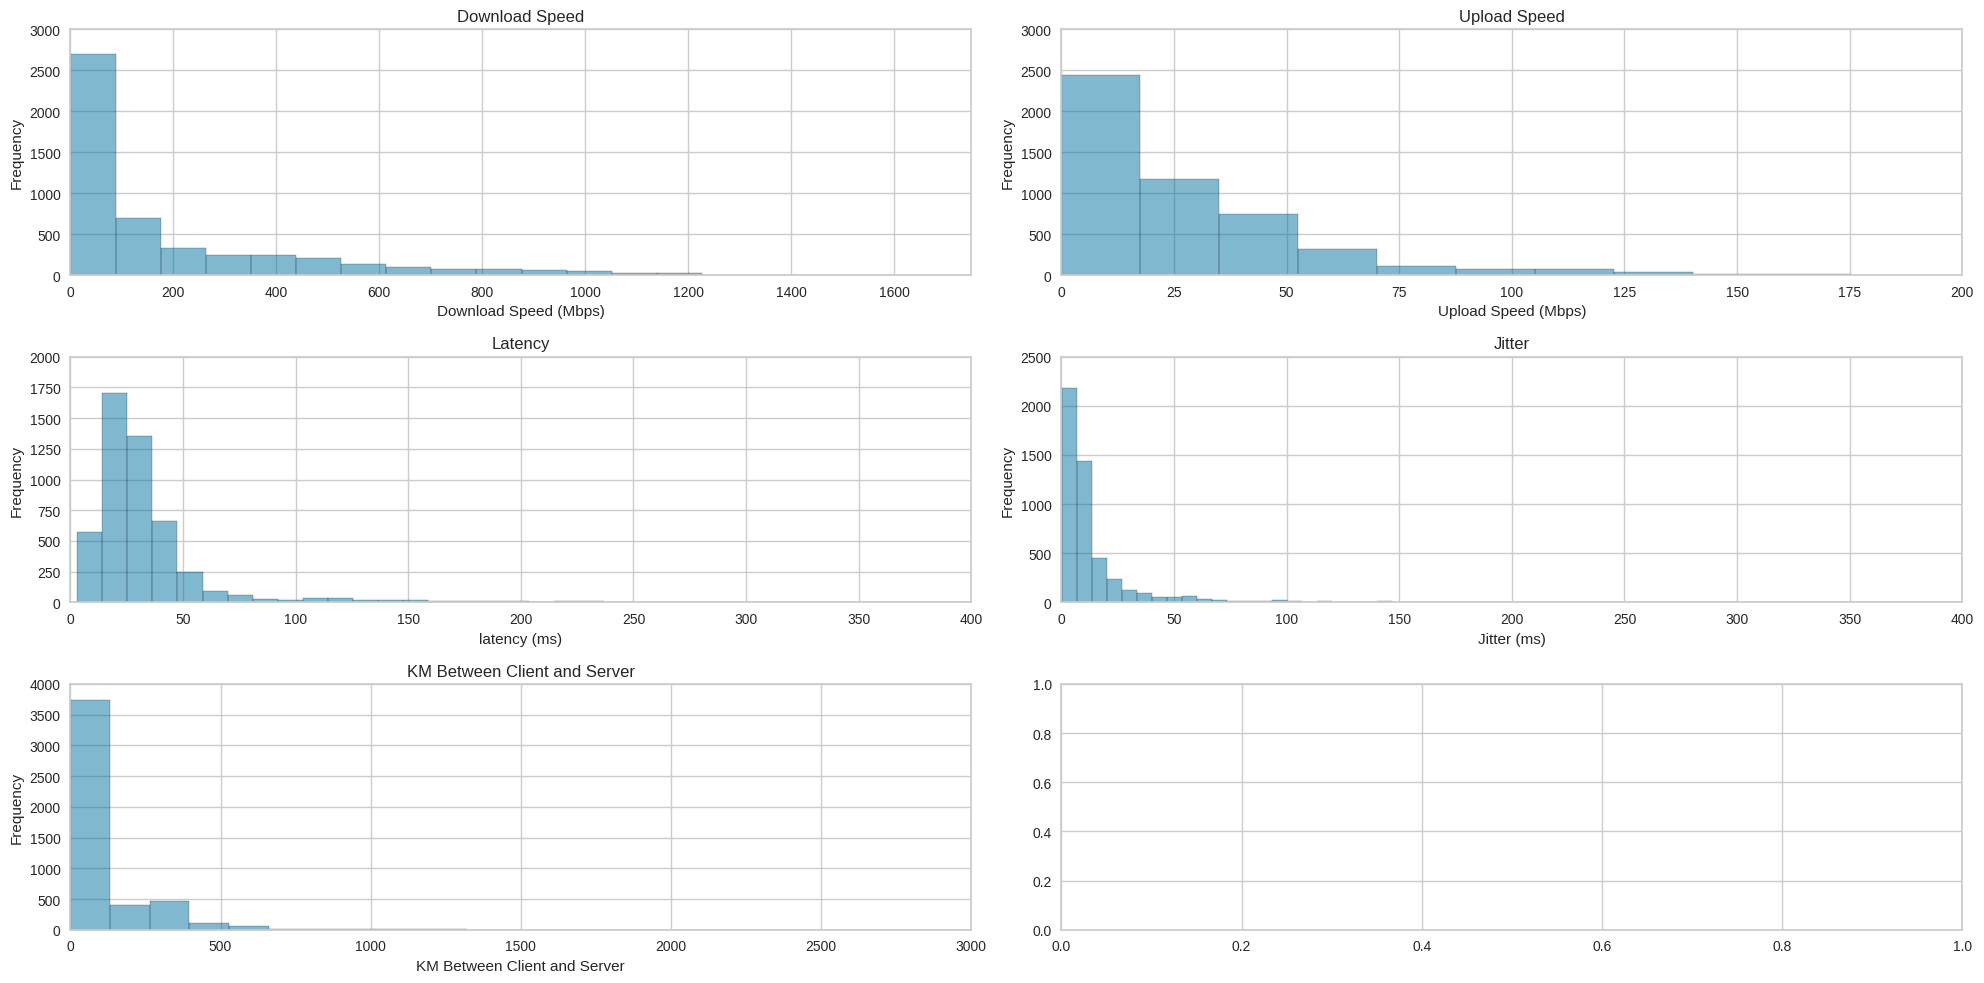

In [ ]:
#plt.hist(android_df['download_mbps'], 50, range=[0, 1750], facecolor='gray', align='mid')

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

#Plot Download Speed
axes[0, 0].hist(android_df['download_mbps'], bins=20, alpha=0.5, edgecolor = 'black')
axes[0, 0].set_title('Download Speed')
axes[0, 0].set_xlabel('Download Speed (Mbps)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xscale('linear')
axes[0, 0].set_xlim(0, 1750)
axes[0, 0].set_ylim(0, 3000)

#Plot Upload Speed
axes[0, 1].hist(android_df['upload_mbps'], bins=10, alpha=0.5, edgecolor = 'black')
axes[0, 1].set_title('Upload Speed')
axes[0, 1].set_xlabel('Upload Speed (Mbps)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xscale('linear')
axes[0, 1].set_xlim(0, 200)
axes[0, 1].set_ylim(0, 3000)

#Plot Latency
axes[1, 0].hist(android_df['latency'], bins=150, alpha=0.5, edgecolor = 'black')
axes[1, 0].set_title('Latency')
axes[1, 0].set_xlabel('latency (ms)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xscale('linear')
axes[1, 0].set_xlim(0, 400)
axes[1, 0].set_ylim(0, 2000)

#Plot Jitter
axes[1, 1].hist(android_df['jitter_a'], bins=150, alpha=0.5, edgecolor = 'black')
axes[1, 1].set_title('Jitter')
axes[1, 1].set_xlabel('Jitter (ms)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xscale('linear')
axes[1, 1].set_xlim(0, 400)
axes[1, 1].set_ylim(0, 2500)

#Plot KM Between Client and Server
axes[2, 0].hist(android_df['km_between'], bins=100, alpha=0.5, edgecolor = 'black')
axes[2, 0].set_title('KM Between Client and Server')
axes[2, 0].set_xlabel('KM Between Client and Server')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_xscale('linear')
axes[2, 0].set_xlim(0, 3000)
axes[2, 0].set_ylim(0, 4000)

plt.tight_layout()
plt.show()

## **#6 Modeling and Model Evaluation**

In [ ]:
# Define weights for network quality for best gaming exprience.
w1 = 0.2
w2 = 0.2
w3 = 0.4
w4 = 0.2

# Calculate the network_quality column.
android_df['network_quality'] = w1 * android_df['download_mbps'] + w2 * android_df['upload_mbps'] - w3 * android_df['latency'] - w4 * android_df['jitter_a']
ios_df['network_quality'] = w1 * ios_df['download_mbps'] + w2 * ios_df['upload_mbps'] - w3 * ios_df['latency'] - w4 * ios_df['jitter_a']

# Define score ranges for categories
android_score_ranges = {
    'Excellent': (android_df['network_quality'] > 50),
    'Good': (android_df['network_quality'] >= 20) & (android_df['network_quality'] <= 50),
    'Fair': (android_df['network_quality'] >= 0) & (android_df['network_quality'] < 20),
    'Poor': (android_df['network_quality'] < 0)
}

ios_score_ranges = {
    'Excellent': (ios_df['network_quality'] > 50),
    'Good': (ios_df['network_quality'] >= 20) & (ios_df['network_quality'] <= 50),
    'Fair': (ios_df['network_quality'] >= 0) & (ios_df['network_quality'] < 20),
    'Poor': (ios_df['network_quality'] < 0)
}

# Assign categories based on score ranges for android dataset.
android_df['network_quality_category'] = 'Unknown'
for category, condition in android_score_ranges.items():
    android_df.loc[condition, 'network_quality_category'] = category

# Assign categories based on score ranges for ios dataset.
ios_df['network_quality_category'] = 'Unknown'
for category, condition in ios_score_ranges.items():
    ios_df.loc[condition, 'network_quality_category'] = category

In [ ]:
# android_df DataFrame with the new columns
android_df.head()

,test_id,android_device_id,test_date,latency,server_name,server_country,client_country,client_region_name,client_city,connection_type,brand,jitter_a,server_selection_a,carrier_name_a,km_between,download_mbps,upload_mbps,network_quality,network_quality_category
0,7923715703,383783238,11/25/2021 18:57,14,Dammam,Saudi Arabia,Saudi Arabia,Eastern Province,Dammam,24,HONOR,21.9,Auto,TEl_co_1,18.891,402.382,18.946,74.286,Excellent
1,7924279882,373115746,11/25/2021 23:18,16,Khobar,Saudi Arabia,Saudi Arabia,Eastern Province,Tarut,24,Xiaomi,2.6,Auto,tel_co_2,40.898,108.705,38.199,22.461,Good
2,7906701631,348926553,11/19/2021 14:38,34,Bahrah,Saudi Arabia,Saudi Arabia,Makkah Province,Jeddah,5,HUAWEI,5.9,Auto,Tel_co_3,40.381,3.399,0.309,-14.038,Poor
3,7910730246,295867697,11/20/2021 23:04,28,Baha,Saudi Arabia,Saudi Arabia,Al Bahah Province,Baljurashi,5,HUAWEI,22.2,USER,tel_co_2,54.549,6.102,15.505,-11.319,Poor
4,7892907247,306911305,11/14/2021 13:56,33,Jubail,Saudi Arabia,Saudi Arabia,Riyadh Province,Riyadh,5,HUAWEI,1.2,USER,tel_co_2,383.393,165.712,56.707,31.044,Good


In [ ]:
# ios_df DataFrame with the new columns
ios_df.head()

,test_id,iphone_device_id,test_date,jitter_a,carrier_name_a,client_region_name,client_city,device_name_a,latency,connection_type,download_mbps,upload_mbps,client_country,network_quality,network_quality_category
0,4867410338,231005010,11/21/2021 0:01,7.9,Tel_co_1,Eastern Province,Dammam,iPhone XS,34,2,44.792,4.715,Saudi Arabia,-5.279,Poor
1,4856897929,230367449,11/13/2021 20:03,0.5,Tel_co_2,Makkah Province,Jeddah,iPhone 13 Pro Max,2,2,104.300,18.424,Saudi Arabia,23.645,Good
2,4839606663,231607369,11/2/2021 0:25,107.8,Tel_co_2,Eastern Province,Al Hufuf,iPhone 12 Pro 5G,58,2,1.452,0.118,Saudi Arabia,-44.446,Poor
3,4865705568,213163021,11/19/2021 21:19,6.3,Tel_co_2,Riyadh Province,Riyadh,iPhone 12 Pro Max 5G,28,12,111.805,12.480,Saudi Arabia,12.397,Fair
4,4872611668,196398438,11/24/2021 17:18,1.2,Tel_co_2,Riyadh Province,Riyadh,iPhone 11,6,2,204.351,34.303,Saudi Arabia,45.091,Good


In [ ]:
# Transform category columns to numeric.
LE = LabelEncoder()

android_df_categories = ['server_name', 'server_country', 'client_country', 'client_region_name', 'client_city', 'brand', 'server_selection_a', 'carrier_name_a']
ios_df_categories = ['carrier_name_a', 'client_region_name', 'client_city', 'device_name_a']

for label in android_df_categories:
    android_df[label]=LE.fit_transform(android_df[label])

for label in ios_df_categories:
    ios_df[label]=LE.fit_transform(ios_df[label])

In [ ]:
android_df.head()

,test_id,android_device_id,test_date,latency,server_name,server_country,client_country,client_region_name,client_city,connection_type,brand,jitter_a,server_selection_a,carrier_name_a,km_between,download_mbps,upload_mbps,network_quality,network_quality_category
0,7923715703,383783238,11/25/2021 18:57,14,17,17,0,5,75,24,1,21.9,0,0,18.891,402.382,18.946,74.286,Excellent
1,7924279882,373115746,11/25/2021 23:18,16,45,17,0,5,132,24,15,2.6,0,2,40.898,108.705,38.199,22.461,Good
2,7906701631,348926553,11/19/2021 14:38,34,13,17,0,8,88,5,2,5.9,0,1,40.381,3.399,0.309,-14.038,Poor
3,7910730246,295867697,11/20/2021 23:04,28,12,17,0,0,68,5,2,22.2,1,2,54.549,6.102,15.505,-11.319,Poor
4,7892907247,306911305,11/14/2021 13:56,33,40,17,0,11,114,5,2,1.2,1,2,383.393,165.712,56.707,31.044,Good


In [ ]:
pip install pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
pip install --upgrade scipy

  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [ ]:
# Split the data into X = independent variables, y = depndent variable.
X_android = android_df.drop(['network_quality_category',
                             'test_id',
                             'test_date',
                             'client_country'],
                             axis=1)

y_android = android_df['network_quality_category']

X_ios = ios_df.drop(['network_quality_category',
                         'test_id',
                         'test_date',
                         'client_country'],
                         axis=1)

y_ios = ios_df['network_quality_category']

In [ ]:
# Model creation and testing will be done using pycaret library
s_android = setup(data = android_df, target = 'network_quality_category')
best_model = compare_models()

,Description,Value
0,Session id,3933
1,Target,network_quality_category
2,Target type,Multiclass
3,Target mapping,"Excellent: 0, Fair: 1, Good: 2, Poor: 3"
4,Original data shape,"(4994, 19)"
5,Transformed data shape,"(4994, 19)"
6,Transformed train set shape,"(3495, 19)"
7,Transformed test set shape,"(1499, 19)"
8,Numeric features,17
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9994,0.9997,0.9994,0.9994,0.9994,0.9992,0.9992,0.1000
lightgbm,Light Gradient Boosting Machine,0.9948,0.9999,0.9948,0.9950,0.9949,0.9927,0.9927,2.3230
rf,Random Forest Classifier,0.9928,1.0000,0.9928,0.9930,0.9928,0.9898,0.9899,0.7430
gbc,Gradient Boosting Classifier,0.9908,0.9998,0.9908,0.9910,0.9908,0.9870,0.9871,3.4710
xgboost,Extreme Gradient Boosting,0.9783,0.9998,0.9783,0.9793,0.9784,0.9693,0.9696,0.2440
ada,Ada Boost Classifier,0.8744,0.9666,0.8744,0.7949,0.8257,0.8190,0.8387,0.3640
et,Extra Trees Classifier,0.8721,0.9754,0.8721,0.8887,0.8760,0.8213,0.8239,0.4280
ridge,Ridge Classifier,0.4392,0.0000,0.4392,0.4887,0.4105,0.2230,0.2422,0.0960
lr,Logistic Regression,0.4160,0.5504,0.4160,0.1731,0.2445,0.0000,0.0000,1.5360
dummy,Dummy Classifier,0.4160,0.5000,0.4160,0.1731,0.2445,0.0000,0.0000,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
android_dt_model = create_model("dt", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9986,0.9991,0.9986,0.9986,0.9986,0.9980,0.9980
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9986,0.9992,0.9986,0.9986,0.9986,0.9980,0.9980
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9994,0.9997,0.9994,0.9994,0.9994,0.9992,0.9992
Std,0.0007,0.0004,0.0007,0.0007,0.0007,0.0010,0.0010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
android_final_dt_model = finalize_model(android_dt_model)

In [ ]:
print(android_final_dt_model)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['test_id', 'android_device_id',
                                             'latency', 'server_name',
                                             'server_country', 'client_country',
                                             'client_region_name',
                                             'client_city', 'connection_type'...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0)

In [ ]:
# Models evaluation using 5-fold cross validation.
cross_validator = ShuffleSplit(n_splits=5, random_state=111)

android_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0,
                               random_state=4833, splitter='best')

score_f1 = cross_val_score(android_model, X_android, y_android, scoring='f1_macro', cv=cross_validator).mean().round(4) * 100
print("The [F1-Score] using Decision Tree Classifier, is: ", score_f1)

The [F1-Score] using Decision Tree Classifier, is:  99.74


In [ ]:
s_ios = setup(data = ios_df, target = 'network_quality_category')
best_model = compare_models()

,Description,Value
0,Session id,1837
1,Target,network_quality_category
2,Target type,Multiclass
3,Target mapping,"Excellent: 0, Fair: 1, Good: 2, Poor: 3"
4,Original data shape,"(9792, 15)"
5,Transformed data shape,"(9792, 15)"
6,Transformed train set shape,"(6854, 15)"
7,Transformed test set shape,"(2938, 15)"
8,Numeric features,12
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9999,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998,0.1570
gbc,Gradient Boosting Classifier,0.9993,1.0000,0.9993,0.9993,0.9993,0.9990,0.9990,7.2080
rf,Random Forest Classifier,0.9940,1.0000,0.9940,0.9941,0.9940,0.9918,0.9918,0.7370
lightgbm,Light Gradient Boosting Machine,0.9924,0.9999,0.9924,0.9925,0.9924,0.9895,0.9896,2.2250
xgboost,Extreme Gradient Boosting,0.9786,0.9997,0.9786,0.9796,0.9786,0.9705,0.9709,0.3710
et,Extra Trees Classifier,0.8359,0.9759,0.8359,0.8648,0.8377,0.7743,0.7823,0.8200
ada,Ada Boost Classifier,0.7933,0.9341,0.7933,0.6809,0.7205,0.7117,0.7589,0.5470
nb,Naive Bayes,0.3779,0.6258,0.3779,0.1933,0.2078,0.0008,0.0115,0.1490
lr,Logistic Regression,0.3774,0.5322,0.3774,0.1425,0.2069,0.0000,0.0000,0.4240
dummy,Dummy Classifier,0.3774,0.5000,0.3774,0.1425,0.2069,0.0000,0.0000,0.2610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
ios_dt_model = create_model("dt", fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9993,0.9994,0.9993,0.9993,0.9993,0.9990,0.9990
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9999,0.9999,0.9999,0.9999,0.9999,0.9998,0.9998
Std,0.0003,0.0002,0.0003,0.0003,0.0003,0.0004,0.0004


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ios_final_dt_model = finalize_model(ios_dt_model)

In [ ]:
print(ios_final_dt_model)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['test_id', 'iphone_device_id',
                                             'jitter_a', 'carrier_name_a',
                                             'client_region_name',
                                             'client_city', 'device_name_a',
                                             'latency', 'connection_type',
                                             'dow...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                          

In [ ]:
# Models evaluation using 5-fold cross validation.
cross_validator = ShuffleSplit(n_splits=5, random_state=111)

ios_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0,
                               random_state=4833, splitter='best')

score_f1 = cross_val_score(ios_model, X_ios, y_ios, scoring='f1_macro', cv=cross_validator).mean().round(4) * 100
print("The [F1-Score] using Decision Tree Classifier, is: ", score_f1)

The [F1-Score] using Decision Tree Classifier, is:  100.0
